here we will visualzie the large datasets that we expanded from the scrapped dataset

In [1]:
#importing libraries
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pubchempy as pcp
import requests
import json
import sys

In [2]:
#helping make the seaborn plots prettier
sns.set(rc={'figure.figsize': (10, 10)})
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
hba = pd.read_csv('../pubchem/similar_compiled_HBA.csv')

In [4]:
hba

,HBA_cid,HBA_smiles
0,23558,CCCCCCCCCC[N+](C)(C)CCCCCCCCCC.[Cl-]
1,8154,CCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
2,62581,CCCCCCCC[N+](C)(C)CCCCCCCC.[Cl-]
3,5946,CC[N+](CC)(CC)CC.[Cl-]
4,74236,CCCC[N+](CCCC)(CCCC)CCCC.[Br-]
5,21218,CCCCCCCC[N+](C)(CCCCCCCC)CCCCCCCC.[Cl-]
6,20708,CCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
7,8155,CCCCCCCCCCCCCCCCCC[N+](C)(C)C.[Cl-]
8,7879,CCCCCCCCCCCCCCCCCC[N+](C)(C)CCCCCCCCCCCCCCCCCC...
9,67553,CCCC[N+](CCCC)(CCCC)CCCC.[I-]


In [34]:
hbd = pd.read_csv('../pubchem/similar_compiled_HBD.csv')

In [35]:
hbd

,HBD_cid,HBD_smiles
0,1176,C(=O)(N)N
1,11457650,C(=O)(N)N
2,636363,C(=O)(N)N
3,101721,C(=O)(N)N.Cl
4,53411231,C(=O)(N)N.Br
5,10197611,C(=O)(N)N
6,2723980,C(=O)(N)N
7,181299,C(=O)(N)N.S
8,86736265,C(=O)(N)N.[Na]
9,86596646,[HH].C(=O)(N)N


Here are the functions we will define that will create "fingerprints" for the chemicals. These fingerprints are sort of a way to digitize the chemical structure so this way we can look at similarities/differences and visualize them on plots. The SMILES string will be used to grab the fingerprints from rdkit.

In [7]:
def fp_list_from_smiles_list(smiles_list,n_bits=2048):
    fp_list = []
    for smiles in tqdm(smiles_list):
        mol = Chem.MolFromSmiles(smiles)
        if mol == None:                  #added this in to skip None as they returned sometimes in the line before
            pass
        else:
            fp_list.append(fp_as_array(mol,n_bits))
    return fp_list

def fp_as_array(mol,n_bits=2048):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=n_bits)
    arr = np.zeros((1,), np.int)
    DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

Grabbing the fingerprints

In [9]:
hba_fp_list = fp_list_from_smiles_list(hba.HBA_smiles)
hbd_fp_list = fp_list_from_smiles_list(hbd.HBD_smiles)

100%|████████████████████████████████████████████████████████████████████████| 106352/106352 [00:20<00:00, 5280.74it/s]


We will continue by using PCA with 2048 bit fingerprints.

In [10]:
from sklearn.decomposition import PCA
#HBA
hba_pca = PCA(n_components=2) 
hba_crds = hba_pca.fit_transform(hba_fp_list)
#HBD
hbd_pca = PCA(n_components=2)
hbd_crds = hbd_pca.fit_transform(hbd_fp_list)

In [11]:
#putting into dataframe

#HBA
hba_crds_df = pd.DataFrame(hba_crds,columns=["PC_1","PC_2"])
hba_crds_df.head()

#HBD
hbd_crds_df = pd.DataFrame(hbd_crds,columns=["PC_1","PC_2"])
hbd_crds_df.head()

,PC_1,PC_2
0,0.644006,-0.222838
1,0.644006,-0.222838
2,0.644006,-0.222838
3,0.652081,-0.228368
4,0.644628,-0.223417


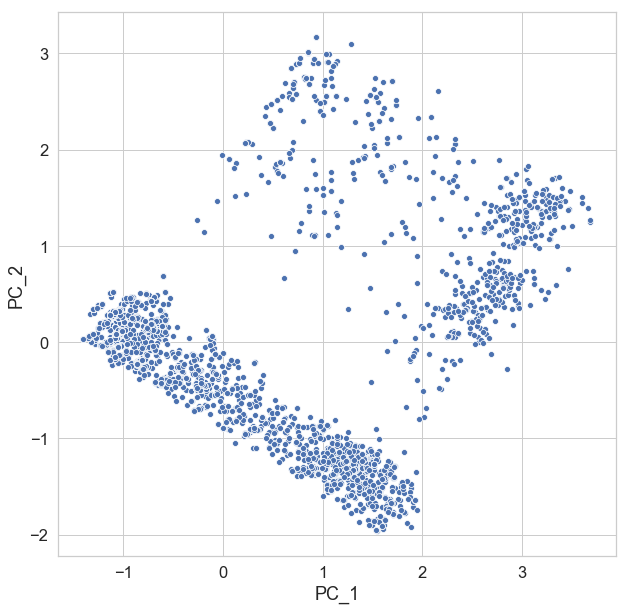

In [12]:
ax1 = sns.scatterplot(data=hba_crds_df,x="PC_1",y="PC_2")

In [13]:
var = np.sum(hba_pca.explained_variance_ratio_)
var

0.22500076385902157

only 22 % variance

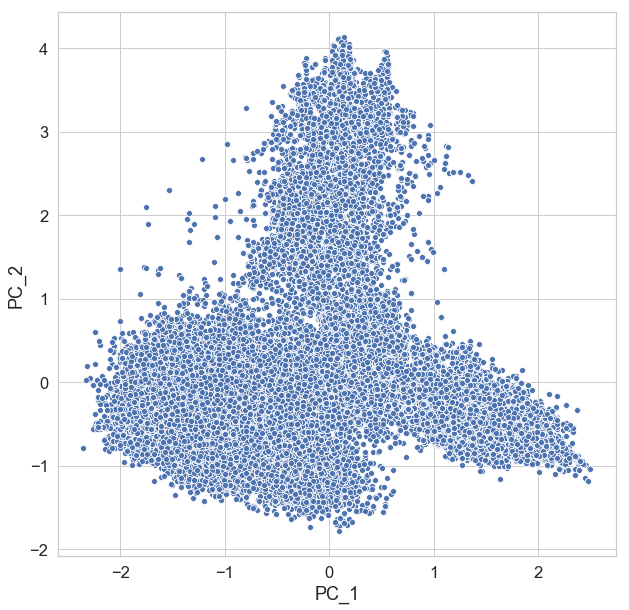

In [14]:
ax2 = sns.scatterplot(data=hbd_crds_df,x="PC_1",y="PC_2")

In [17]:
var = np.sum(hbd_pca.explained_variance_ratio_)
var

0.12253403762990775

Only 12% for HBD

We will see how the variance changes with number of components

In [31]:
def evaluate_components(fp_list):
    res = []
    for n_comp in tqdm(range(2,90)):
        pca = PCA(n_components=n_comp)
        crds = pca.fit_transform(fp_list) 
        var = np.sum(pca.explained_variance_ratio_)
        res.append([n_comp,var])
    return res

100%|██████████████████████████████████████████████████████████████████████████████████| 88/88 [00:36<00:00,  2.38it/s]


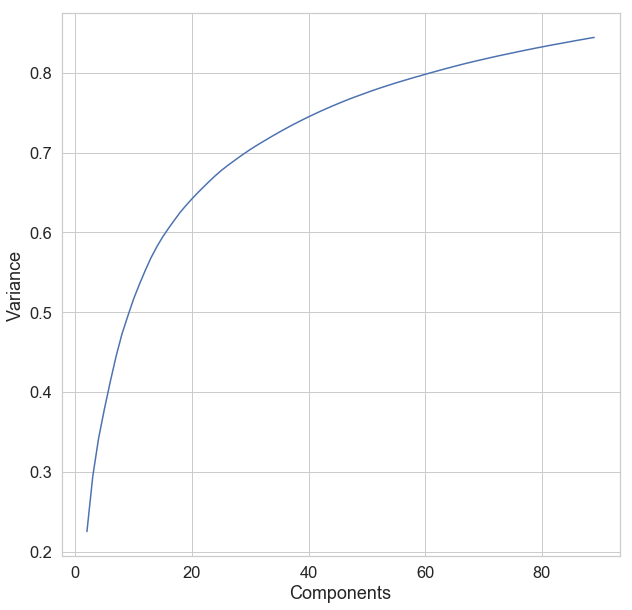

In [32]:
#HBA
# Run the function above on our fingerprint list
hba_comp_res = evaluate_components(hba_fp_list)

#Put these results into a dataframe
hba_res_df = pd.DataFrame(hba_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax = sns.lineplot(data=hba_res_df,x="Components",y="Variance")

Begins to level off after 50 PC so that should be fine.

In [27]:
hba_pca = PCA(n_components=90)
hba_crds = hba_pca.fit_transform(hba_fp_list)

In [28]:
from sklearn.manifold import TSNE
%time hba_crds_embedded = TSNE(n_components=2).fit_transform(hba_crds)

Wall time: 37.5 s


In [29]:
#adding to df
hba_tsne_df = pd.DataFrame(hba_crds_embedded,columns=["X","Y"])
hba_tsne_df.head()

,X,Y
0,-40.571827,0.260009
1,-30.944998,-59.713852
2,-40.634205,0.341612
3,13.111135,-3.872022
4,22.200943,-30.986582


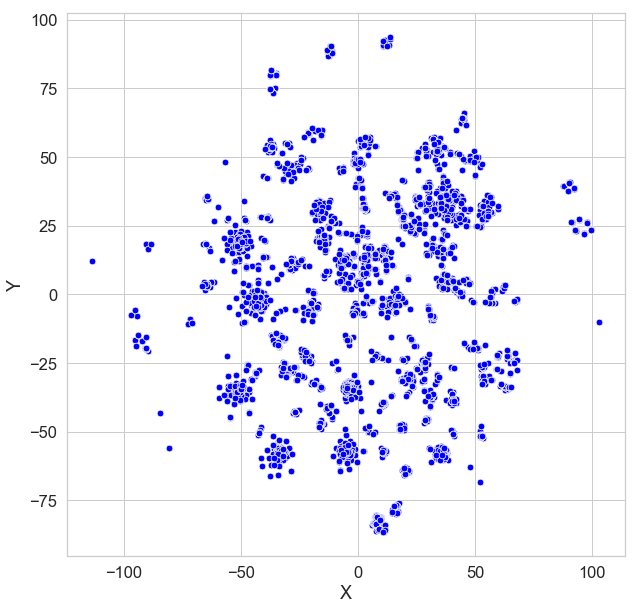

In [30]:
ax = sns.scatterplot(data=hba_tsne_df,x="X",y="Y", s = 45, color = "blue")

100%|██████████████████████████████████████████████████████████████████████████████████| 88/88 [12:37<00:00,  8.60s/it]


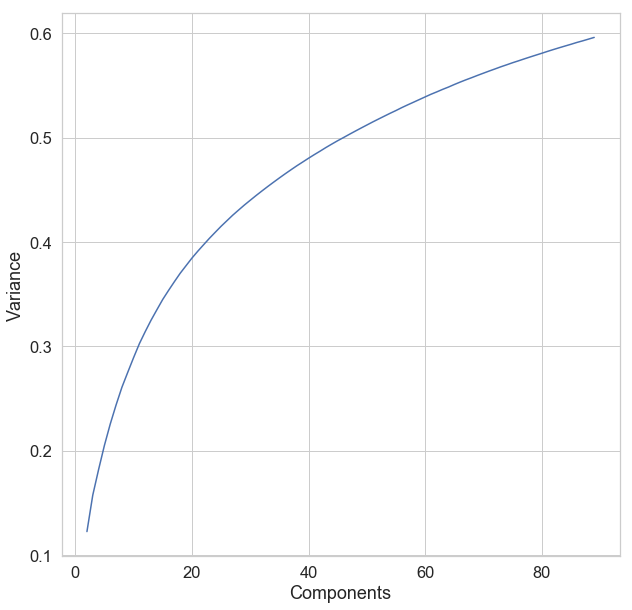

In [39]:
#HBD
# Run the function above on our fingerprint list
hbd_comp_res = evaluate_components(hbd_fp_list)

#Put these results into a dataframe
hbd_res_df = pd.DataFrame(hbd_comp_res,columns=["Components","Variance"])

#Make a line plot of the number of components vs the variance explained
ax = sns.lineplot(data=hbd_res_df,x="Components",y="Variance")

In [40]:
hbd_pca = PCA(n_components=90)
hbd_crds = hbd_pca.fit_transform(hbd_fp_list)

In [41]:
%time hbd_crds_embedded = TSNE(n_components=2).fit_transform(hbd_crds)

Wall time: 32min 40s


In [42]:
hbd_tsne_df = pd.DataFrame(hbd_crds_embedded,columns=["X","Y"])
hbd_tsne_df.head()

,X,Y
0,41.126411,20.323742
1,41.126335,20.323685
2,41.126320,20.323662
3,41.192604,20.606525
4,41.124573,20.331165


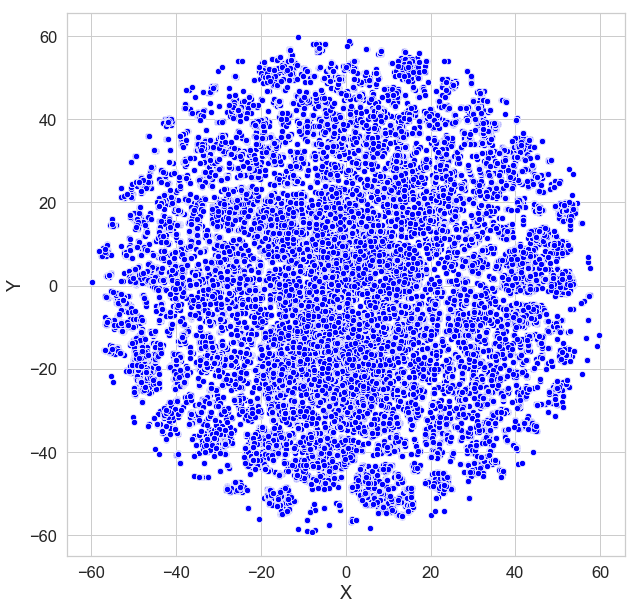

In [44]:
ax = sns.scatterplot(data=hbd_tsne_df,x="X",y="Y", s = 40, color = "blue")